In [124]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [127]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

 <b>8. This question involves the use of simple linear regression on the Auto
 data set.<br>
 (a) Use the sm.OLS() function to perform a simple linear regression
 with mpg as the response and horsepower as the predictor. Use
 the summarize() function to print the results. Comment on the
 output. For example:

In [128]:
Auto = load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [129]:
allvars = Auto[["horsepower"]]
y= Auto["mpg"]

X = MS(allvars).fit_transform(Auto)
model = sm.OLS(y,X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        06:30:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
RSE = np.sqrt(result.mse_resid)
Relativeerror= (RSE/np.mean(y))*100
print(f"Relative error={Relativeerror}, RSE value = {RSE}")



Relative error=20.923714066914833, RSE value = 4.90575691954594


In [131]:
Testset=pd.DataFrame({'horsepower':[98]})
newX = sm.add_constant(Testset,has_constant='add')
newprediction= result.get_prediction(newX)
newprediction.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


<b>i)</b> Since the p value is < 0.05 this means that a relationship between the predictor (horsepower) and response (mpg) exists</n> 


<b>ii)</b> rsq tells us that roughly 60 % of the variation in mpg is described by horsepower , decent fit , explains 60 percent of the variability, the RSE value is 4.9 which givves us a standard relative error of 20% , meaning our predictions deviate from the actual value by 20 % of th average mpg, if avg is 23 then our predictions will deviate about 4.9 from it.

<b>iii)</b> the relationship is negative as we can see from the horsepower coefficient, meaning , with an increase in the horsepower the value of mpg decreases 

<b>iv)</b> for a horsepower of 98 , the predicted mean value is 24.4 , the confidence and predicted interval both can be referenced above

<b> (b) Plot the response and the predictor in a new set of axes ax. Use
 the ax.axline() method or the abline() function defined in the
 lab to display the least squares regression line.

/tmp/ipykernel_2056/1011505442.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, result.params[0],result.params[1] , 'r--');


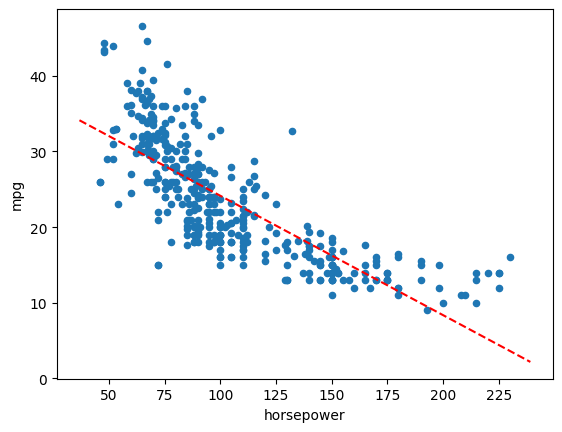

In [132]:
def abline(ax, b , m, *arge):
    "Add a line with a slo[pe m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge)




ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, result.params[0],result.params[1] , 'r--');

<b> (c) Produce some of diagnostic plots of the least squares regression
 f
 it as described in the lab. Comment on any problems you see
 with the fit.

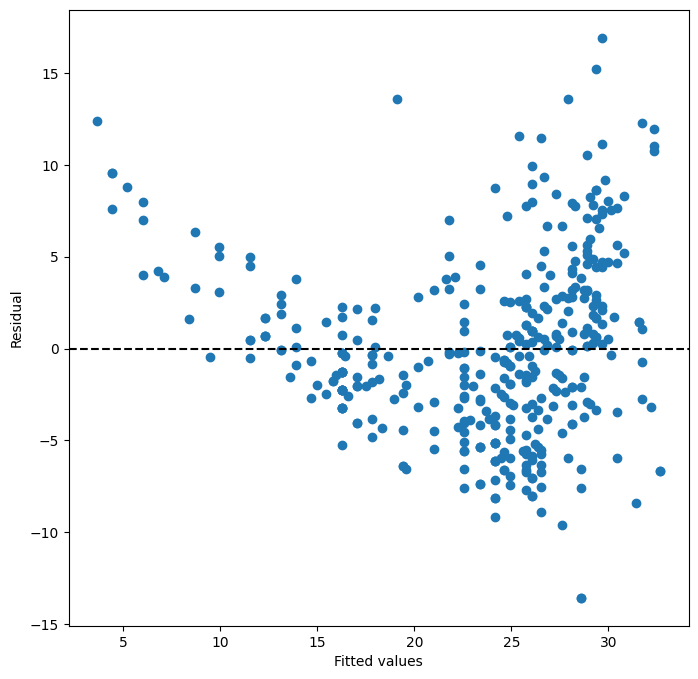

In [133]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(c="k", ls = "--");

We can clearly see non linearity in the plot , meaning our model is not that good , the magnitude of residual (y-yhat) is too much in some cases

<b> 9. This question involves the use of multiple linear regression on the
 Auto data set.<br>
 (a) Produce a scatterplot matrix which includes all of the variables
 in the data set.</b>

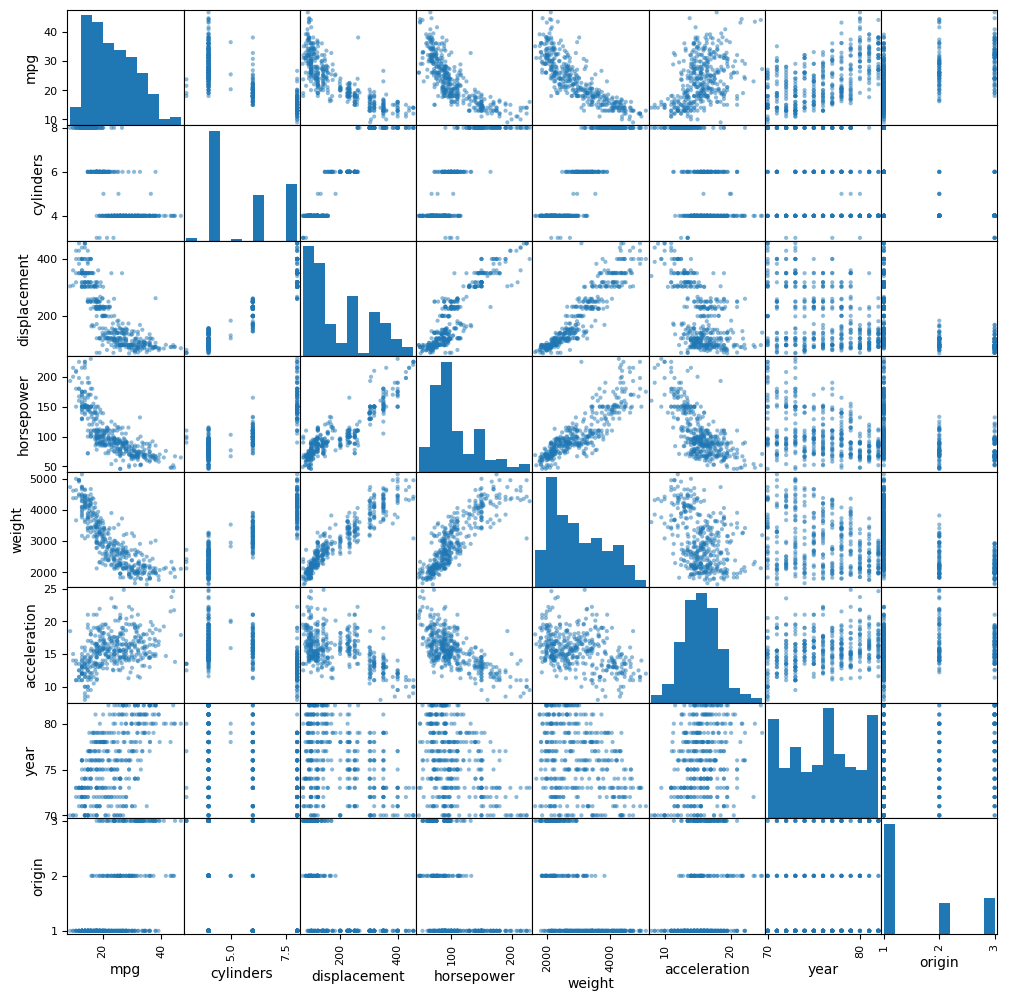

In [134]:
pd.plotting.scatter_matrix(Auto, figsize=(12,12));

<b>(b) Compute the matrix of correlations between the variables using
 the DataFrame.corr() method.

In [135]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [136]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=X.columns[1:])
vif

,vif
horsepower,1.0


<b>(c) Use the sm.OLS() function to perform a multiple linear regression
 with mpg as the response and all other variables except name as
 the predictors. Use the summarize() function to print the results.
 Comment on the output. For instance:<br><br>
 i. Is there a relationship between the predictors and the re
sponse? Use the anova_lm() function from statsmodels to
 answer this question.

In [137]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [138]:


allvars=list(Auto.columns.drop('mpg'))
formula = 'mpg ~ ' + ' + '.join(allvars)
result2= smf.ols(formula , data= Auto).fit()
X= result2.model.exog
result2.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        06:30:14   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 The model summary provides detailed statistical information. The high R-squared value (around 0.82) indicates that about 82% of the variance in mpg is explained by the predictors. The F-statistic's high value and very low p-value (Prob(F-statistic)) suggest that the overall model is statistically significant and not due to chance. Looking at the individual p-values for each predictor, displacement, weight, year, and origin appear to be statistically significant, while cylinders, horsepower, and acceleration are not, given the presence of other predictors in the model

In [139]:
anova_lm(result2)

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


<b> ii. Which predictors appear to have a statistically significant
 relationship to the response?

here we can see that all predictors except Acceleration are significant (p alues) with cylinders being the extremely significant ; Cylinders and displacement also explain the most variability in mpg , biggest contributor (TSS) 

<b>iii. What does the coefficient for the year variable suggest?

The coefficient of year variable suggests that for everyu other predictor constant, a 1 unit change in year the reposne variable that is mpg , increases by 0.7 miles / gallon

<b> (d) Produce some of diagnostic plots of the linear regression fit as
 described in the lab. Comment on any problems you see with the
 f
 it. Do the residual plots suggest any unusually large outliers?
 Does the leverage plot identify any observations with unusually
 high leverage?

/tmp/ipykernel_2056/783933715.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(result2.fittedvalues[i], result2.resid[i] , str(i), fontsize=9, color='red');


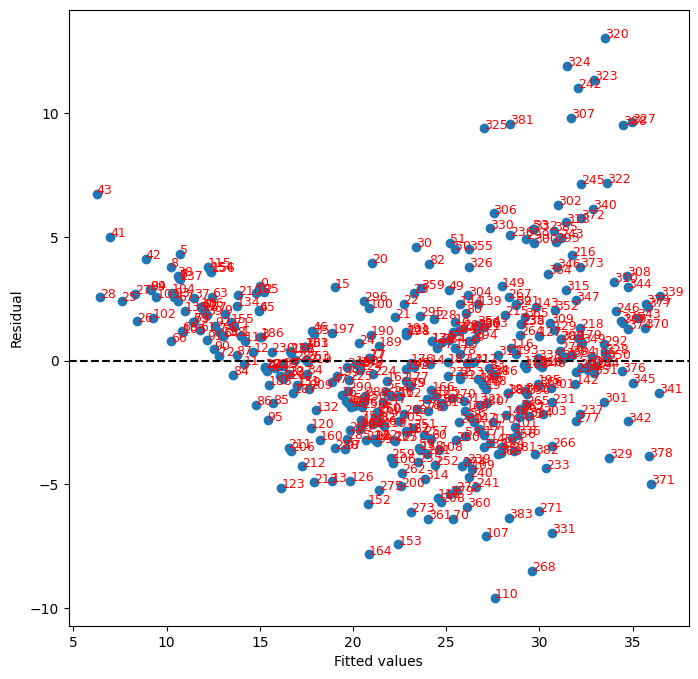

In [140]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(result2.fittedvalues, result2.resid)
for i in range(len(result2.fittedvalues)):
    ax.text(result2.fittedvalues[i], result2.resid[i] , str(i), fontsize=9, color='red');

ax.set_xlabel("Fitted values");
ax.set_ylabel("Residual");
ax.axhline(c="k", ls = "--");
#substituting i with 13 we can see that its residual value is close to -5

the residual plot clearly shows that despite multiple predictors, the data is still highly non linear , we might end up needing some form of polynomial transformation , and outliers


In [141]:

i=320
comparison = (Auto.iloc[i] - Auto.mean()) / Auto.std()
comparison
#z score comparison , the values seem ok 

mpg             2.966568
cylinders      -0.862911
displacement   -1.036008
horsepower     -1.025414
weight         -1.021405
acceleration    0.854944
year            1.091394
origin          1.767147
dtype: float64

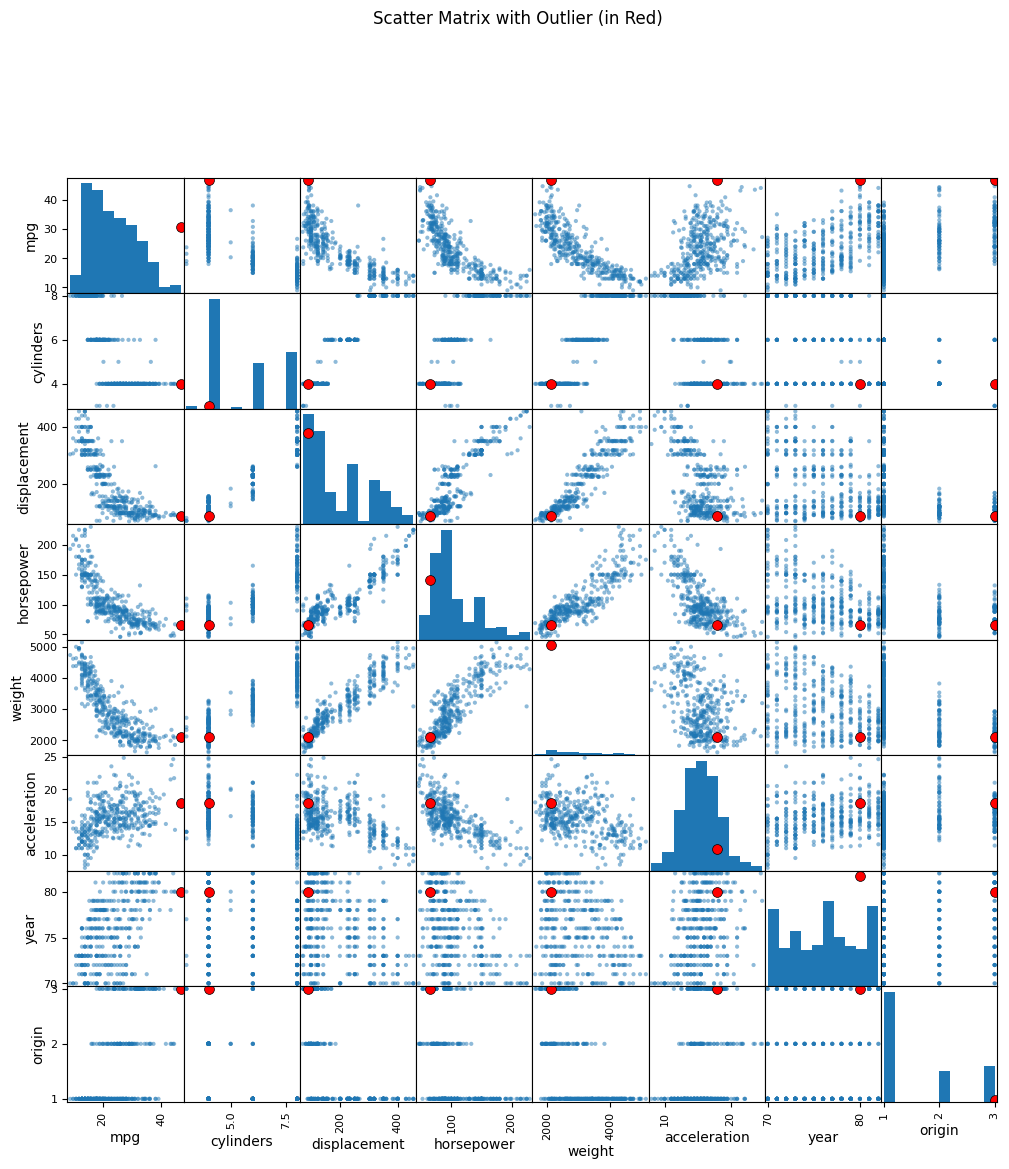

In [142]:
Auto = Auto.reset_index(drop=True)
i=320
axes = pd.plotting.scatter_matrix(Auto, figsize=(12,12));
for ax in axes.flatten():
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    if x_var in Auto.columns and y_var in Auto.columns:
        ax.scatter(
            Auto.loc[i, x_var],
            Auto.loc[i, y_var],
            color='red',
            s=50,
            edgecolor='black',
            linewidth=0.5
        )

plt.suptitle("Scatter Matrix with Outlier (in Red)", y=1.02)
plt.show()

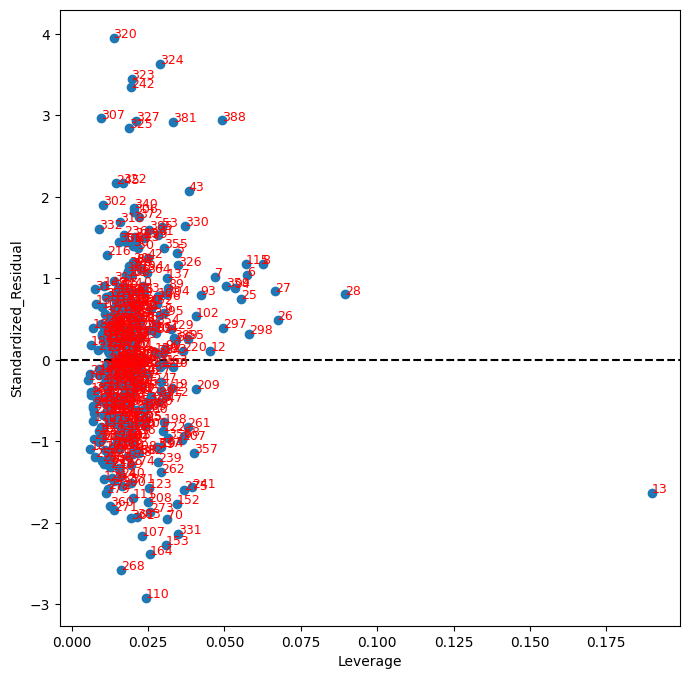

In [143]:
influence = result2.get_influence()
leverage = influence.hat_matrix_diag
standardized_resid = influence.resid_studentized_internal

ax= subplots(figsize=(8,8))[1]
ax.scatter(leverage, standardized_resid)
for i in range(len(leverage)):
    ax.text(leverage[i], standardized_resid[i] , str(i), fontsize=9, color='red')

ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized_Residual")
ax.axhline(c="k", ls = "--");

In [144]:
#this code has been made via AI help

import numpy as np
from numpy.linalg import lstsq

X = result2.model.exog  # design matrix including intercept if any
n, p = X.shape

predictor_names = result2.model.exog_names  # list of predictor names including intercept if present

partial_leverages = []

for j in range(p):
    xj = X[:, j].reshape(-1, 1)
    idx = [k for k in range(p) if k != j]
    X_not_j = X[:, idx]

    coef, _, _, _ = lstsq(X_not_j, xj, rcond=None)
    residuals = xj - X_not_j @ coef

    part_leverage_j = (residuals ** 2) / np.sum(residuals ** 2)
    partial_leverages.append(part_leverage_j.flatten())

partial_leverages = np.array(partial_leverages)  # shape (p, n)

i = 13  # data point index to inspect
print(f"Partial leverage for data point {i} across predictors:")
for j, name in enumerate(predictor_names):
    print(f"{name}: {partial_leverages[j, i]}")



Partial leverage for data point 13 across predictors:
Intercept: 0.0034119370625241775
cylinders: 0.008365621840905562
displacement: 0.054120041750060126
horsepower: 0.05588863609278668
weight: 0.13994505366364704
acceleration: 0.039823947206003796
year: 0.0021649071400596624
origin: 2.770784689005274e-06


13th index ot 14th row in the dataframe point has unusually large leverage

In [145]:
i=13
comparison = (Auto.iloc[i] - Auto.mean()) / Auto.std()
comparison
#z scores of displacement adn horsepower clearly indicate that they are highly influential predictors pulling the regression line towards themselves ,
#accelaration is not considered as it is statistically insignificant as discussed above 

mpg            -1.210238
cylinders       1.482053
displacement    2.490234
horsepower      3.131384
weight          0.127638
acceleration   -2.008554
year           -1.623241
origin         -0.715726
dtype: float64

From our above analysis we can see that displacement and horsepower are 2 predictors that we will perform transformations on as they have very high z scores combined with moderate partial leverage , we will also add their interaction terms to check it 

In [146]:
vals = [VIF(X, i) for i in range(1, result2.model.exog.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=result2.model.exog_names[1:])
vif
#displacement is highly redundant due to its high multicolinearity , by looking at the corr matrix we can also see that displacement has a High positive corr with 
#hp #weight and cylinder , the other high vif predictors 

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


adding interaction terms we get
disp:horsepower - rsq value went from 0.82 to 0.86
disp:cyll - no change 
disp: weight 0.864 to 0.866 - high p value 


<b>(e) Fit some models with interactions as described in the lab. Do
 any interactions appear to be statistically significant?

In [147]:


newallvars=list(Auto.columns.drop('mpg'))
formula = 'mpg ~ ' + ' + '.join(allvars) + '+ displacement:horsepower' + '+displacement:weight'
result3= smf.ols(formula , data= Auto).fit()
X= result3.model.exog
result3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          1.32e-160
Time:                        06:30:18   Log-Likelihood:                -967.54
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     382   BIC:                             1995.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8055      4.273     -0.423      0.673     -10.207       6.596
cylinders                   0.5432      0.303      1.795      0.073      -0.052       1.138
displacement               -0.0816      0.011     -7.303      0.000      -0.104      -0.060
horsepower                 -0.1480      0.028     -5.206      0.000      -0.204      -0.092
weight                     -0.0059      0.001     -4.627      0.000      -0.008      -0.003
acceleration               -0.1276      0.096     -1.324      0.186      -0.317       0.062
year                        0.7559      0.045     16.830      0.000       0.668       0.844
origin                      0.5638      0.256      2.203      0.028       0.061       1.067
displacement:horsepower     0.0004   8.07e-05      4.477      0.000       0.000       0.001
displacement:weight      9.276e-06   3.72e-06      2.494      0.013    1.96e-06    1.66e-05
==============================================================================
Omnibus:                       47.049   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.722
Skew:                           0.653   Prob(JB):                     3.65e-22
Kurtosis:                       5.083   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
print(result.rsquared_adj) #single linear regression
print(result2.rsquared_adj)#multiple linear regression 
print(result3.rsquared_adj)# multiple linear regression with interaction term 
#as we see adding an interaction term increased the rsquared value by 4% making the new model a way better fit due to higher explanation 

0.6049378688071001
0.8182237705835791
0.8626367764065951


In [149]:
print(np.sqrt(result.scale))
print(np.sqrt(result2.scale))
print(np.sqrt(result3.scale))
#a decreasing RSE value 

4.90575691954594
3.327682396406639
2.8927344057063813


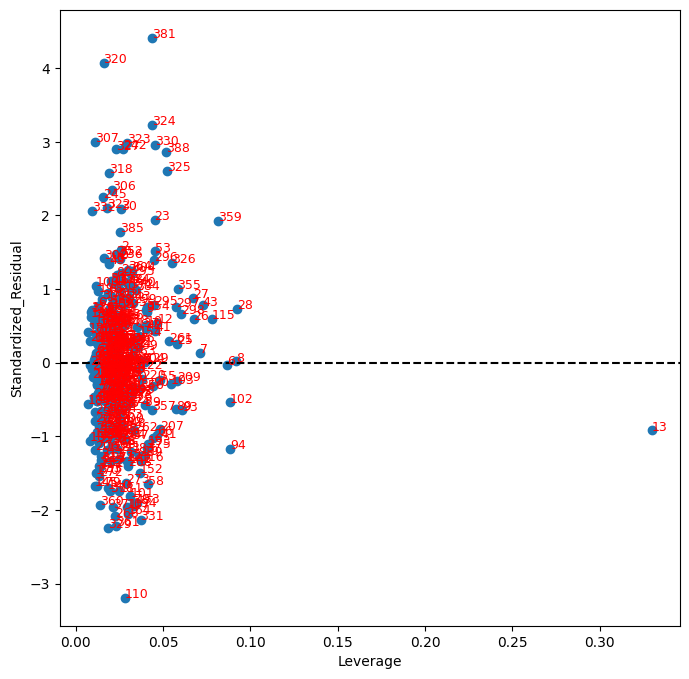

In [150]:
#leverage plots
influence = result3.get_influence()
leverage = influence.hat_matrix_diag
standardized_resid = influence.resid_studentized_internal

ax= subplots(figsize=(8,8))[1]
ax.scatter(leverage, standardized_resid)
for i in range(len(leverage)):
   ax.text(leverage[i], standardized_resid[i] , str(i), fontsize=9, color='red')

ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized_Residual")
ax.axhline(c="k", ls = "--");
# as we see although outliers are still there , some valuse from the botom are closer to the cluster 

/tmp/ipykernel_2056/3271014939.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].text(result2.fittedvalues[i], result2.resid[i] , str(i), fontsize=9, color='red');


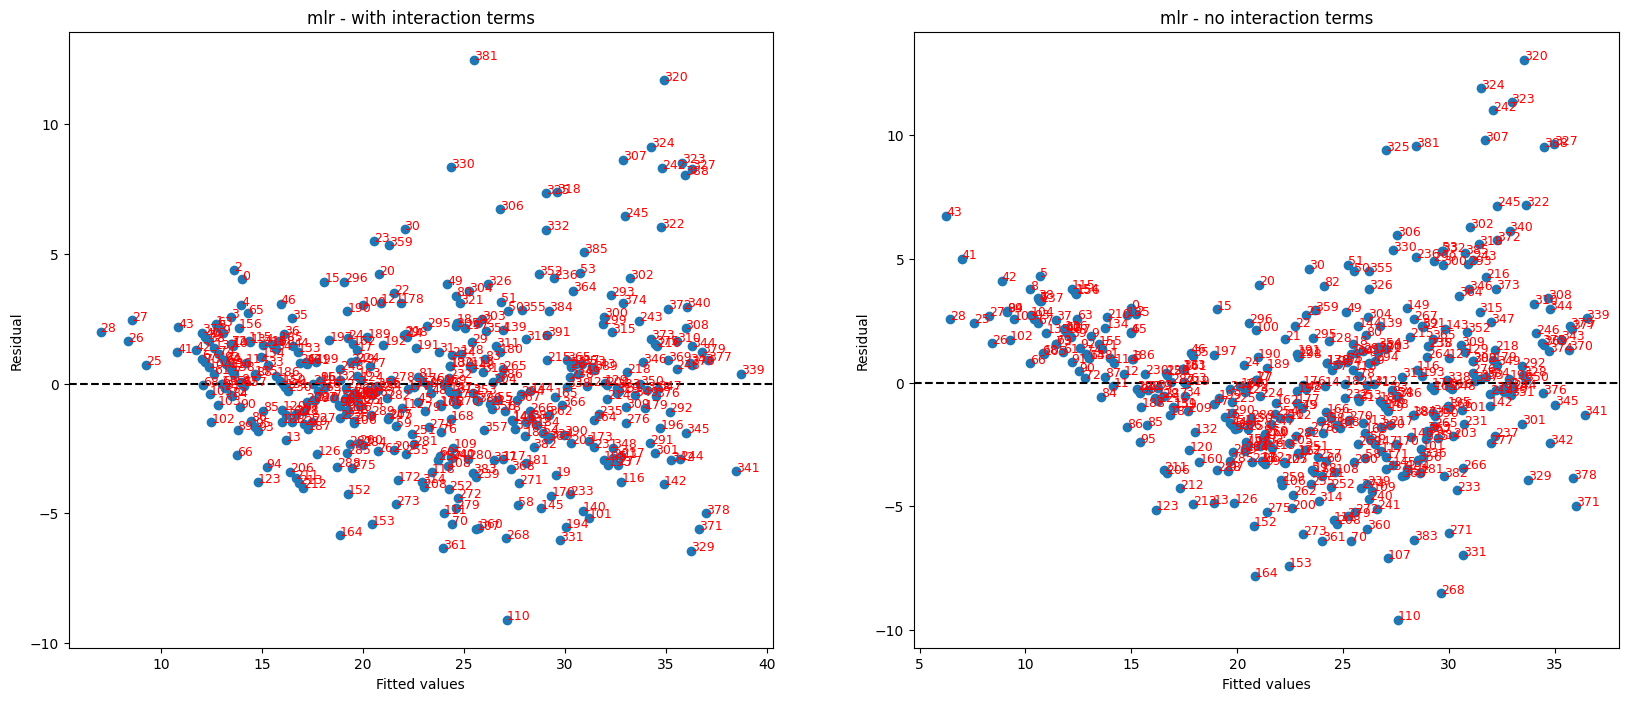

In [151]:
#residual plot
fig, ax= subplots(nrows=1, ncols= 2 , figsize=(20,8))
ax[0].scatter(result3.fittedvalues, result3.resid)
for i in range(len(result3.fittedvalues)):
    ax[0].text(result3.fittedvalues[i], result3.resid[i] , str(i), fontsize=9, color='red');

ax[0].set_title("mlr - with interaction terms")
ax[0].set_xlabel("Fitted values");
ax[0].set_ylabel("Residual");
ax[0].axhline(c="k", ls = "--");
ax[1].scatter(result2.fittedvalues, result2.resid)
for i in range(len(result2.fittedvalues)):
    ax[1].text(result2.fittedvalues[i], result2.resid[i] , str(i), fontsize=9, color='red');

ax[1].set_title("mlr - no interaction terms")
ax[1].set_xlabel("Fitted values");
ax[1].set_ylabel("Residual");
ax[1].axhline(c="k", ls = "--");

#the values have become closer to 0 meanign our model with the interaction term is a better fit 

Try a few different transformations of the variables, such as
log(X), X, X2. Comment on your findings. , we will try transforming displacement 

log(displacement)- pvalue too  high 


<b>(f) Try a few different transformations of the variables, such as
 log(X), X, X2. Comment on your findings.

In [152]:
#new_auto = Auto.assign(inversedispintocylinders = np.log(Auto['horsepower']))
new_auto = Auto.assign(inversedispintocylinders = 1/(Auto['displacement']*Auto['cylinders']))#p value <0.05 rest most transformations had their p value >0.05 
newallvars=list(new_auto.columns.drop('mpg'))
formula = 'mpg ~ ' + ' + '.join(newallvars) + '+ displacement:horsepower' + '+ displacement:weight'
result4= smf.ols(formula , data= new_auto).fit()
X= result4.model.exog
result4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     250.7
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          8.45e-161
Time:                        06:30:21   Log-Likelihood:                -964.16
No. Observations:                 392   AIC:                             1950.
Df Residuals:                     381   BIC:                             1994.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.0130      5.703      1.405      0.161      -3.200      19.226
cylinders                    0.3553      0.309      1.150      0.251      -0.252       0.963
displacement                -0.1105      0.016     -7.004      0.000      -0.142      -0.079
horsepower                  -0.1506      0.028     -5.331      0.000      -0.206      -0.095
weight                      -0.0073      0.001     -5.300      0.000      -0.010      -0.005
acceleration                -0.1243      0.096     -1.299      0.195      -0.312       0.064
year                         0.7473      0.045     16.714      0.000       0.659       0.835
origin                       0.6917      0.259      2.672      0.008       0.183       1.201
inversedispintocylinders -1543.2876    599.123     -2.576      0.010   -2721.289    -365.286
displacement:horsepower      0.0004   8.05e-05      4.747      0.000       0.000       0.001
displacement:weight       1.458e-05   4.23e-06      3.449      0.001    6.27e-06    2.29e-05
==============================================================================
Omnibus:                       53.236   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.642
Skew:                           0.742   Prob(JB):                     2.56e-24
Kurtosis:                       5.109   Cond. No.                     3.49e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
print(result.rsquared_adj) #single linear regression
print(result2.rsquared_adj)#multiple linear regression 
print(result3.rsquared_adj)
print(result4.rsquared_adj)

0.6049378688071001
0.8182237705835791
0.8626367764065951
0.8646337205440083


In [154]:
print(np.sqrt(result.scale))
print(np.sqrt(result2.scale))
print(np.sqrt(result3.scale))
print(np.sqrt(result4.scale))

4.90575691954594
3.327682396406639
2.8927344057063813
2.8716305848240897


Rsq and rse values clearly indicate that our model is now better then before , even marginally 

/tmp/ipykernel_2056/2335238767.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].text(results[i].fittedvalues[j], results[i].resid[j], str(j), fontsize=9, color='red')


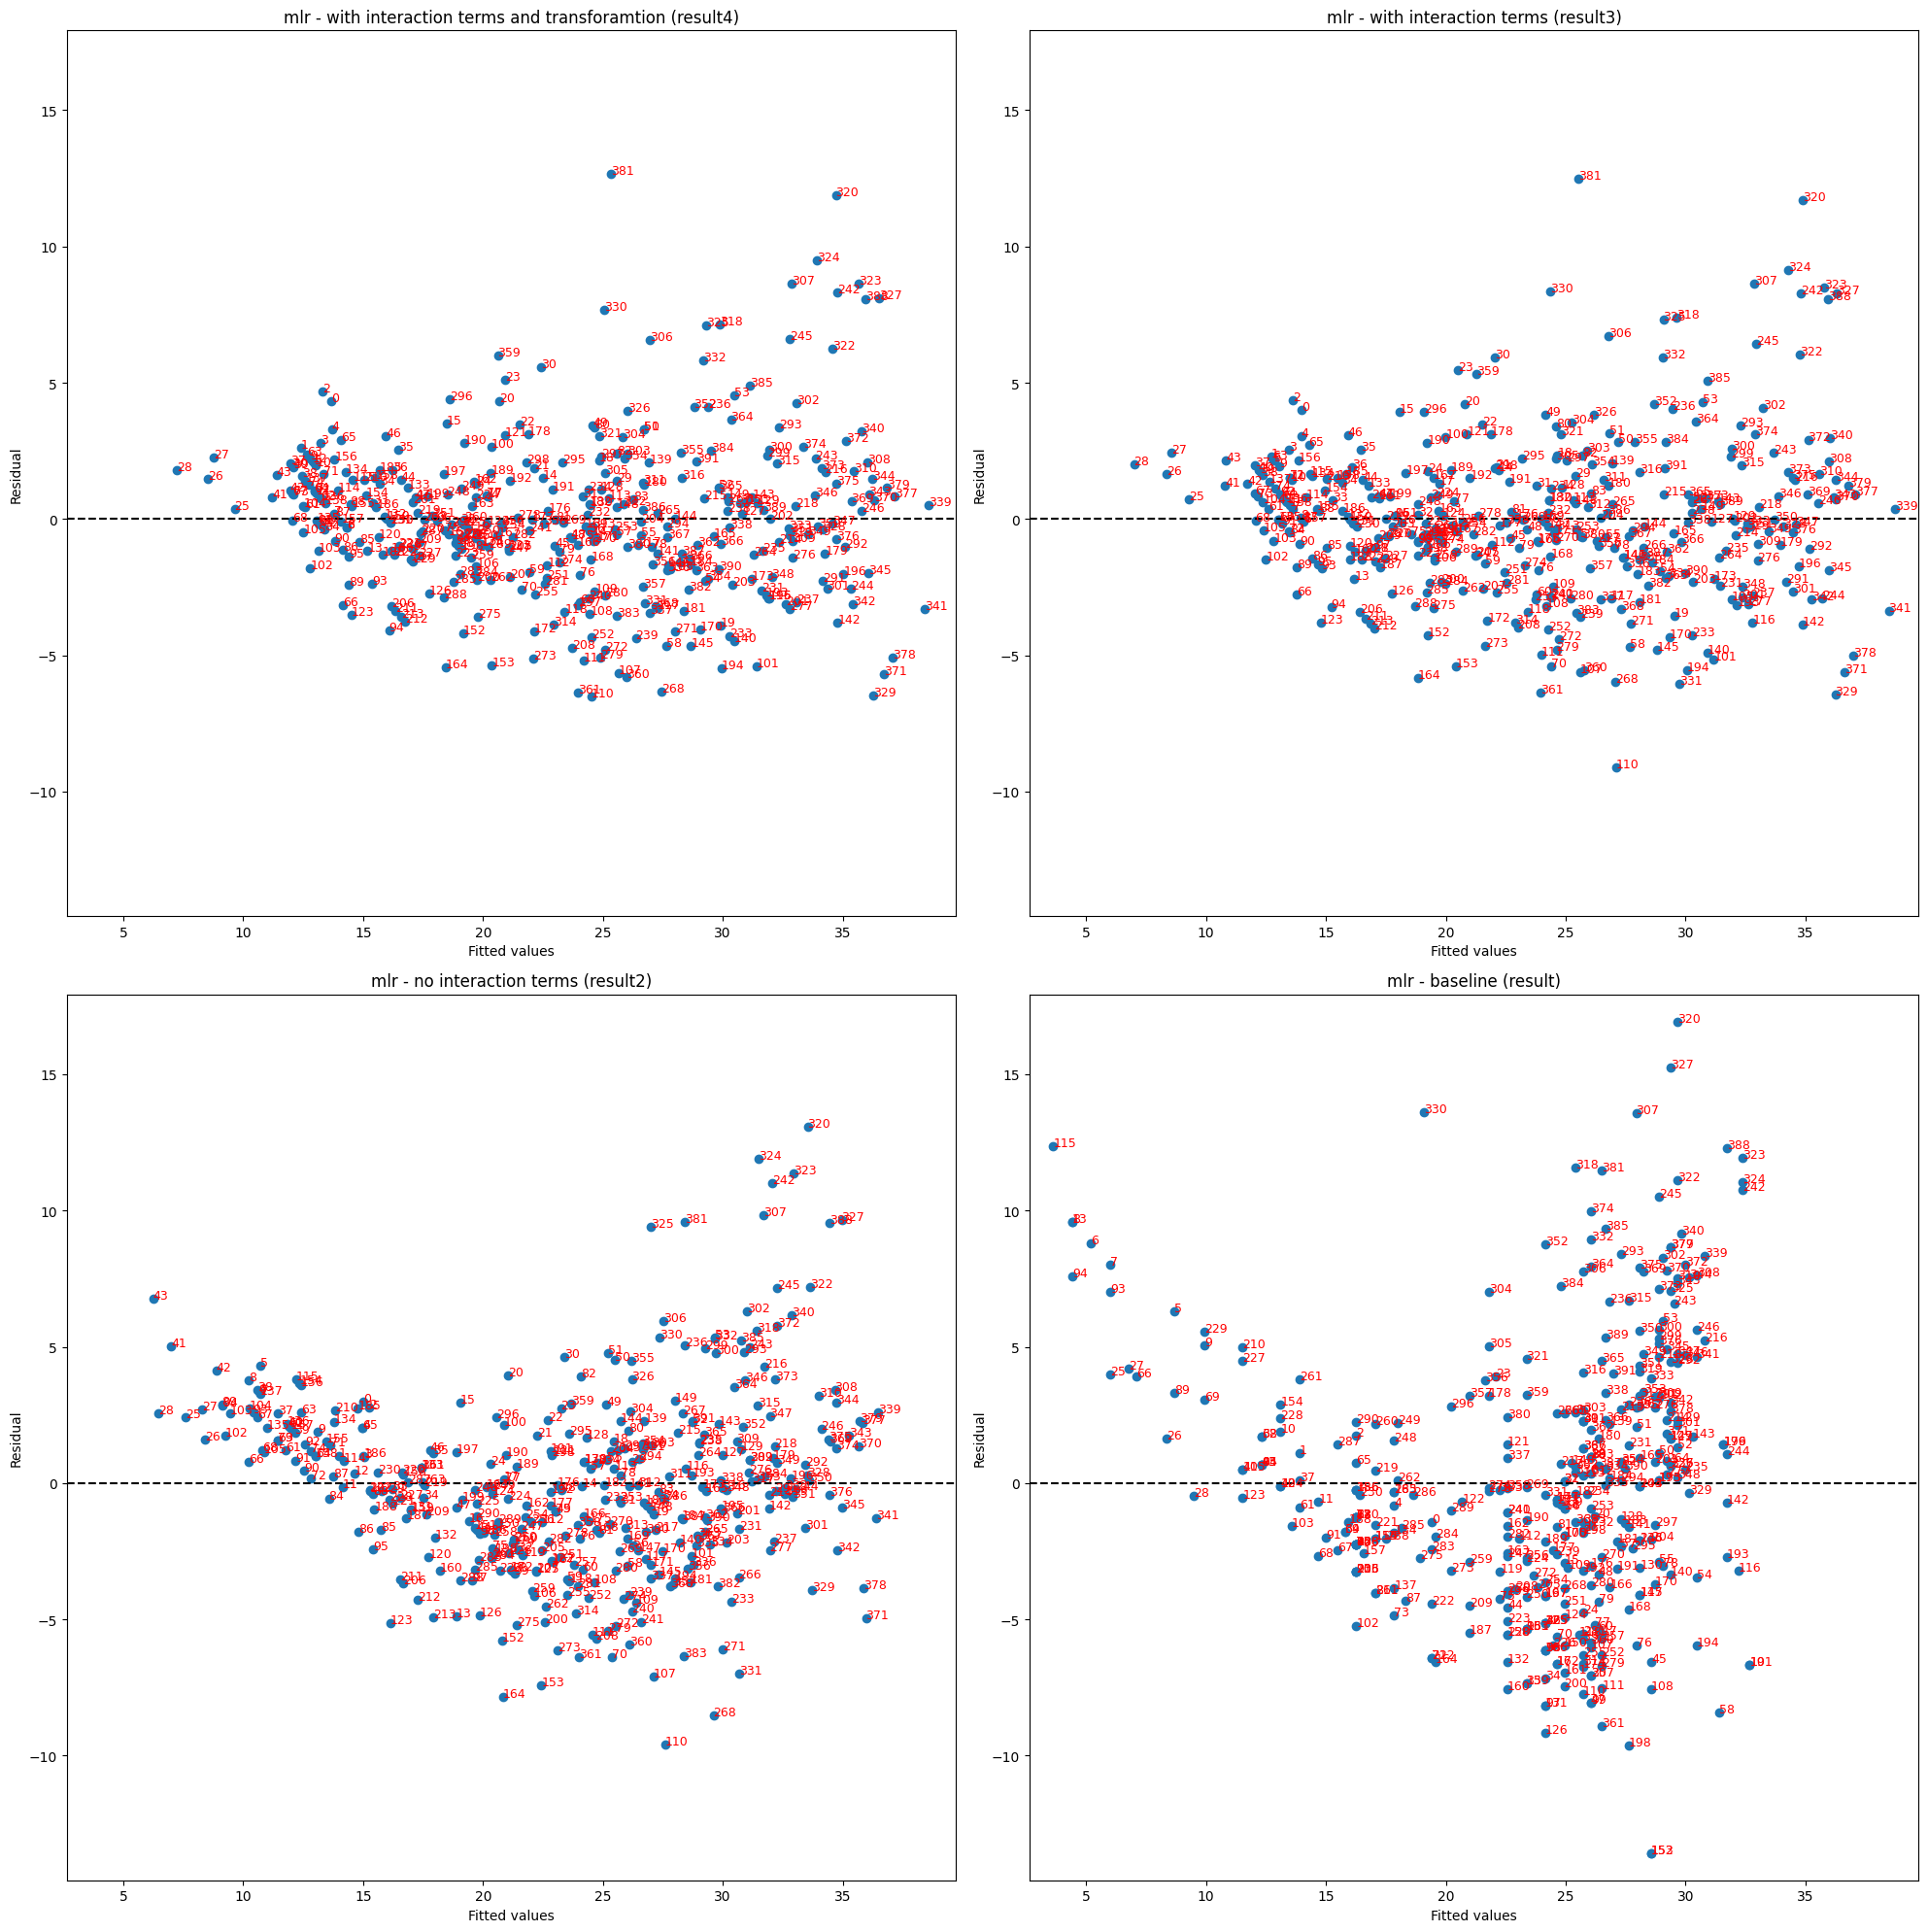

In [155]:
#reidual plot comparison
fig, ax = subplots(nrows=2, ncols=2, figsize=(20, 20))

ax = ax.flatten()  # Flatten to 1D array for easy indexing


results = [result4, result3, result2, result]
titles = [
    "mlr - with interaction terms and transforamtion (result4)",
    "mlr - with interaction terms (result3)",
    "mlr - no interaction terms (result2)",
    "mlr - baseline (result)"
]

# Get global min/max for x (fitted) and y (residual) for propper scaling and better comparison across har ek plot
all_fitted = np.concatenate([res.fittedvalues for res in results])
all_resid = np.concatenate([res.resid for res in results])

x_min, x_max = all_fitted.min(), all_fitted.max()
y_min, y_max = all_resid.min(), all_resid.max()

for i in range(4):
    ax[i].scatter(results[i].fittedvalues, results[i].resid)
    for j in range(len(results[i].fittedvalues)):
        ax[i].text(results[i].fittedvalues[j], results[i].resid[j], str(j), fontsize=9, color='red')
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("Fitted values")
    ax[i].set_ylabel("Residual")
    ax[i].axhline(c="k", ls="--")
    ax[i].set_xlim(x_min-1, x_max+ 1)
    ax[i].set_ylim(y_min-1, y_max+ 1)

fig.tight_layout();
plt.show();

As we can see from above that the model improved with more transforamtion and its non linearity reduced significantly 

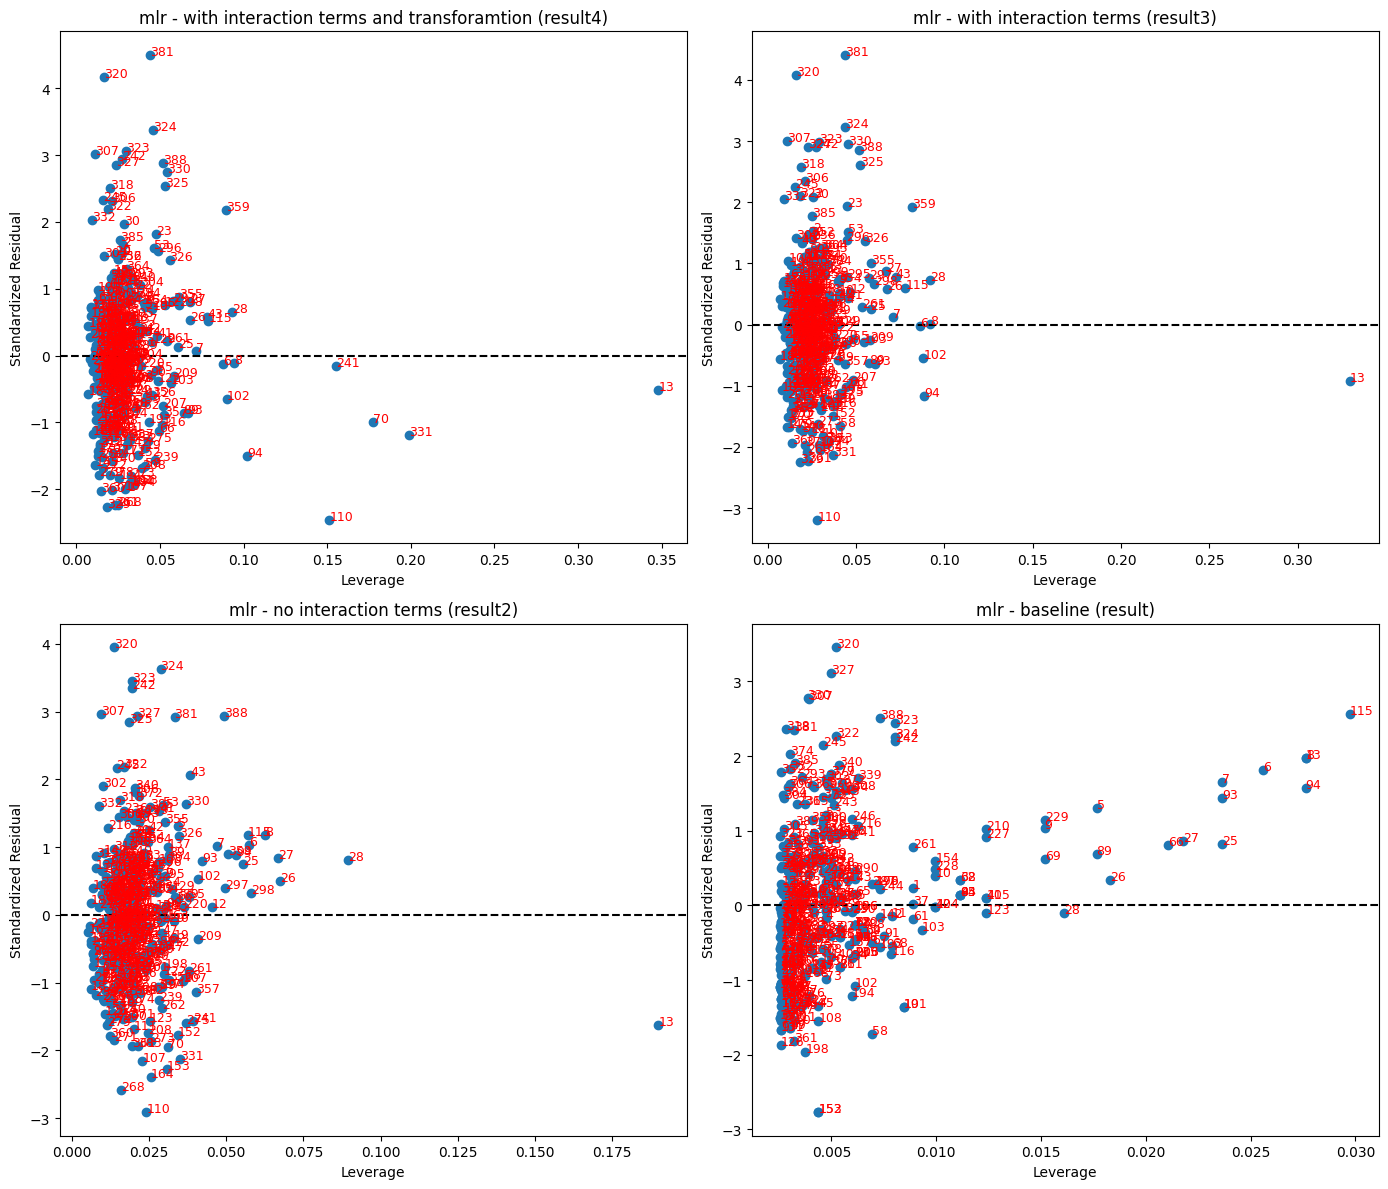

In [156]:
#leverage plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
ax = ax.flatten()
results = [result4, result3, result2, result]

titles = [
    "mlr - with interaction terms and transforamtion (result4)",
    "mlr - with interaction terms (result3)",
    "mlr - no interaction terms (result2)",
    "mlr - baseline (result)"
]

for i, res in enumerate(results):
    influence = res.get_influence()
    leverage = influence.hat_matrix_diag
    standardized_resid = influence.resid_studentized_internal
    
    ax[i].scatter(leverage, standardized_resid)
    for j in range(len(leverage)):
        ax[i].text(leverage[j], standardized_resid[j], str(j), fontsize=9, color='red')

    ax[i].set_xlabel("Leverage")
    ax[i].set_ylabel("Standardized Residual")
    ax[i].set_title(titles[i])
    ax[i].axhline(0, color="k", linestyle="--")
    

fig.tight_layout()

<b>1. High leverage and high studentized residual</b><br>
Interpretation: <b><i>This is the classic influential point.</i></b> <br>
What it says: Because of its high leverage, it has a disproportionate ability to "pull" the regression line toward itself. Its high residual shows that even with this pull, it is still a poor fit for the model. This combination means the point can significantly alter the slope and intercept of the regression line.
How to deal with it:
Investigate the data: Check for potential data entry errors, measurement errors, or unusual circumstances during data collection.
Validate the point: If the data is correct, the point may represent a special circumstance or a flaw in the model.
Run a sensitivity analysis: Rerun the model with and without the point to see how much the coefficients change. Report both results if the point is a legitimate but unusual observation.
Consider robust regression: Use robust regression techniques that are less sensitive to influential observations. <br>
<b>2. High leverage and low studentized residual</b>
Interpretation: <b><i>This is a high-leverage point that is not an outlier.</i></b> 
What it says: The datapoint has an extreme x-value but falls close to the regression line. This point has high potential to influence the model, but because it is consistent with the model, it actually strengthens the model's fit and increases the R-squared value. It may not change the slope of the line much, but it can affect the standard errors of the coefficients and thus the p-values.
How to deal with it:
Do not remove it: A legitimate data point that fits the model well should not be removed just because it has high leverage.
Recognize its impact: Understand that this point may increase the apparent strength of your regression.
Plot the data: Use a residuals-vs-leverage plot to visualize these points and ensure you understand their presence and effect on the model. <br>
<b>3. Low leverage and high studentized residual</b>
<b></i>Interpretation: This is a clear outlier.</i></b> 
What it says: The datapoint's x-value is close to the mean, but its y-value is far from the regression line. Because its x-value is not extreme, it does not exert much pull on the regression line's slope. It simply creates a large, obvious residual.
How to deal with it:
Investigate the data: As with influential points, check for data errors.
Do a sensitivity analysis: Removing this type of point will not drastically alter the slope or intercept, but it can reduce the standard error and increase the R-squared. You can choose to report results both with and without the outlier.
Look for special causes: If the data point is legitimate, it may indicate a special cause or a flaw in the model's assumptions.
Consider transformation: If there are many such points, a transformation of the dependent variable may be needed to satisfy the model's assumptions.<br> 
<b>4. Low leverage and low studentized residual</b>
Interpretation: This is an ordinary datapoint. 
What it says: The datapoint is not unusual in either its x-value or its y-value and fits the model well. This type of point supports the model and helps define the regression line.
How to deal with it:
Keep the data: This is the ideal type of datapoint and requires no special action. It is a reliable part of your dataset that confirms the fitted model. 

The appearance of more high-leverage points after a transformation is not an inherent failure, but a consequence of reshaping the data's distribution. It's a signal to investigate whether the transformation's benefits (e.g., linearizing a relationship) outweigh the drawback of having a model that is more susceptible to influential observations. The key is to check the residuals of these new high-leverage points to understand their actual influence on the model

<b>10. This question should be answered using the Carseats data set.<br>
 (a) Fit a multiple regression model to predict Sales using Price,
 Urban, and US.

In [157]:
Carseats = load_data("Carseats")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [158]:
carvars=list(Carseats.columns.drop('Sales'))
formula = 'Sales ~ ' + '+ Price'+'+ Urban' +'+ US'
resultCar1= smf.ols(formula , data= Carseats).fit()
X= resultCar1.model.exog
resultCar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.39e-23
Time:                        06:30:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> (b) Provide an interpretation of each coefficient in the model. Be
 careful—some of the variables in the model are qualitative!for a qualitative</b><br><br> variable like US and Urban , the reference variable is taken as NO this is whyw e see Yes veruiosin on the model , its coeff denote avg difference in sales of YES compared to the reference variable (0) , No in this case , we also see that the p value for urban is > 0.05 meaning , that the evidence to reject null hypothesis is very low , so we will accept the null hypothesis for Urban insinuating that there is no statistical difference in the outcome between the categories 

<b>(c) Write out the model in equation form, being careful to handle
 the qualitative variables properly.</b><br>

 Sales = 13.04 -0.02*Urban(yes) +1.2*US(yes) + error 

<b>(d) For which of the predictors can you reject the null hypothesis
 H0 : j =0?</b><br>
 US and Price , their p value is low 

 <b>(e) On the basis of your response to the previous question, fit a
 smaller model that only uses the predictors for which there is
 evidence of association with the outcome.

In [159]:
carvars=list(Carseats.columns.drop('Sales'))
formula = 'Sales ~ ' + '+ Price' +'+ US'
resultCar2= smf.ols(formula , data= Carseats).fit()
X= resultCar2.model.exog
resultCar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.66e-24
Time:                        06:30:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 <b>(f) How well do the models in (a) and (e) fit the data?

In [160]:
print(resultCar1.rsquared , resultCar2.rsquared)
print(resultCar1.rsquared_adj , resultCar2.rsquared_adj)
print(np.sqrt(resultCar1.scale) , np.sqrt(resultCar2.scale))



0.23927539218405558 0.23926288842678567
0.2335123269733287 0.23543045965311715
2.4724924402701642 2.469396800574444


#both models explain about 23% variance int he whole Carseat data

<b>(g) Using the model from (e), obtain 95% confidence intervals for
 the coefficient(s).

In [161]:
resultCar2.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


none of the above values contain 0 therefore all of them are statistically significant 


<b>(h) Is there evidence of outliers or high leverage observations in the
 model from (e)?

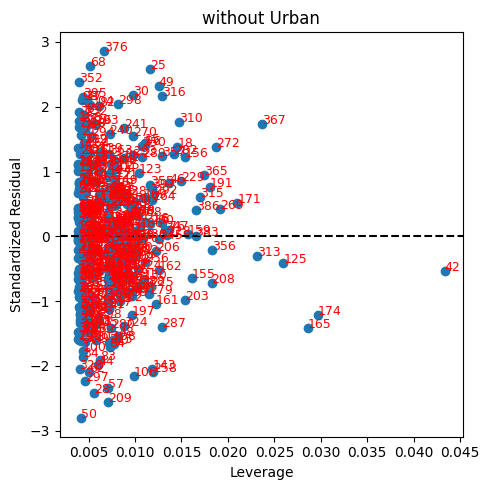

In [162]:
fig, ax = plt.subplots( figsize=(5,5))

influence = resultCar2.get_influence()
leverage = influence.hat_matrix_diag
standardized_resid = influence.resid_studentized_internal
    
ax.scatter(leverage, standardized_resid)
for j in range(len(leverage)):
    ax.text(leverage[j], standardized_resid[j], str(j), fontsize=9, color='red')

ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized Residual")
ax.set_title("without Urban")
ax.axhline(0, color="k", linestyle="--")
    

fig.tight_layout()
#no difference AT ALL 

the residual values are decent adn not much indicating there isnt any stong outlier but some points also have high leverage , datapoint 174 adn165 adn 367 are worth checking adn investigating as they have high influential potential ,yes points having low leverage but high residual , means that they are outliers and we can see there are many , although the overall residual values of all are well within normal range

<b>11. In this problem we will investigate the t-statistic for the null hypoth
esis H0 : =0in simple linear regression without an intercept. To
 begin, we generate a predictor x and a response y as follows.<br>
 rng = np.random.default_rng(1)
 x = rng.normal(size=100)
 y = 2 * x + rng.normal(size=100)<br>
 (a) Perform a simple linear regression of y onto x, without an in
tercept. Report the coefficient estimate ˆ, the standard error of
 this coefficient estimate, and the t-statistic and p-value associ
ated with the null hypothesis H0 : =0. Comment on these
 results. (You can perform regression without an intercept using
 the keywords argument intercept=False to ModelSpec().)


In [163]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [164]:
yonxdata= pd.DataFrame({'x':x , 'y':y})
formula = 'y ~ + x -1'
resultyonx = smf.ols(formula , data= yonxdata).fit()
#X= result11.model.exog
resultyonx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 08 Oct 2025   Prob (F-statistic):                    6.23e-31
Time:                        06:30:27   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

this means that for a 1 unit change in x the response variable y will increase by 1.97 a the p value indicates that this coeff is statistically significant , the std error is low and the range does not include 0 meaning this coeff suits the model

<b>(b) Now perform a simple linear regression of x onto y without an
 intercept, and report the coefficient estimate, its standard error,
 and the corresponding t-statistic and p-values associated with
 the null hypothesis H0 : =0. Comment on these results.

In [165]:
xonydata= pd.DataFrame({'x':y , 'y':x})
formula = 'y ~ + x -1'
resultxony = smf.ols(formula , data= xonydata).fit()
#X= result11.model.exog
resultxony.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 08 Oct 2025   Prob (F-statistic):                    6.23e-31
Time:                        06:30:27   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the interpretation is the same as above but with differeing values 

<b> (c)What is the relationship between the results obtained in (a) and
 (b)?

product of the coeff = rsq

<b>d) for algebric proof , refer to conceptual questions of this chapter , now we theorize adn evaluat t statistic using code

In [166]:
t_values = resultyonx.tvalues

print('tvalue to check from model', t_values)

tvalue to check from model x    16.898417
dtype: float64


In [167]:
sum_xiyi = (yonxdata['x'] * yonxdata['y']).sum()
sum_xi2 = (yonxdata['x']**2).sum()
sum_yi2 = (yonxdata['y']**2).sum()
n = len(yonxdata)

In [168]:
t_manual = np.sqrt(((n - 1) * sum_xiyi**2) / (sum_xi2 * sum_yi2 - sum_xiyi**2))
print(f"t-statistic from manual calculation: {t_manual}")

t-statistic from manual calculation: 16.898417063035094


In [169]:
print(f"\nManual calculation matches statsmodels result: {np.isclose(abs(t_manual), abs(t_values))}")



Manual calculation matches statsmodels result: [ True]


 <b>(e) Using the results from (d), argue that the t-statistic for the re
gression of y onto x is the same as the t-statistic for the regression
 of x onto y.

In [170]:
#now we do for x on y regression 
t_values = resultxony.tvalues

print('tvalue to check from model', t_values)
sum_xiyi = (xonydata['x'] * xonydata['y']).sum()
sum_xi2 = (xonydata['x']**2).sum()
sum_yi2 = (xonydata['y']**2).sum()
n = len(xonydata)

t_manual = np.sqrt(((n - 1) * sum_xiyi**2) / (sum_xi2 * sum_yi2 - sum_xiyi**2))
print(f"t-statistic from manual calculation: {t_manual}")

print(f"\nManual calculation matches statsmodels result: {np.isclose(abs(t_manual), abs(t_values))}")


tvalue to check from model x    16.898417
dtype: float64
t-statistic from manual calculation: 16.898417063035094

Manual calculation matches statsmodels result: [ True]


<b>(f) In python, show that when regression is performed with an intercept,
 the t-statistic for H0 : 1 =0is the same for the regression of y
 onto x as it is for the regression of x onto y.

In [171]:
yonxdata= pd.DataFrame({'x':x , 'y':y})
formula = 'y ~ + x'
resultyonx1 = smf.ols(formula , data= yonxdata).fit()
#X= result11.model.exog
resultyonx1.tvalues


Intercept    -0.756096
x            16.734055
dtype: float64

In [172]:
xonydata= pd.DataFrame({'x':y , 'y':x})
formula = 'y ~ + x'
resultxony1 = smf.ols(formula , data= xonydata).fit()
#X= result11.model.exog
resultxony1.tvalues


Intercept     0.216082
x            16.734055
dtype: float64

as we see from above both the t values for each variable is same for each variable 

<b> 12. This problem involves simple linear regression without an intercept.<br><br>
 (a) Recall that the coefficient estimate ˆfor the linear regression of
 Y onto X without an intercept is given by (3.38). Under what
 circumstance is the coefficient estimate for the regression of X
 onto Y the same as the coefficient estimate for the regression of
 Y onto X? <br></b><br>
 refer to the conceptual questions for the solution

 <b>(b) Generate an example in Python with n = 100 observations in
 which the coefficient estimate for the regression of X onto Y
 is different from the coefficient estimate for the regression of Y
 onto X.</b><br><br>
 refer to coeff of models from previous quesion where there is no intercept , the values are not normalized to 1 that is sum of xsq and sum(ysq) is not equal to 1 unlike the one bellow

<b> (c) Generate an example in Python with n = 100 observations in
 which the coefficient estimate for the regression of X onto Y is
 the same as the coefficient estimate for the regression of Y onto
 X<br>

In [173]:
rng = np.random.default_rng(1)
n = 100
x_base = rng.normal(size=n)
y_base = 2 * x_base + rng.normal(size=n)


#here we normalise all values  
x = x_base / np.sqrt(np.sum(x_base**2))
y = y_base / np.sqrt(np.sum(y_base**2))
data = pd.DataFrame({'x': x, 'y': y})

formula_y_on_x = 'y ~ x - 1'
result_y_on_x = smf.ols(formula_y_on_x, data=data).fit()
coeff_y_on_x = result_y_on_x.params['x']
print("Regression of Y onto X (without intercept):")
print(f"Coefficient estimate for x: {coeff_y_on_x:.6f}")
print("-" * 30)
formula_x_on_y = 'x ~ y - 1'
result_x_on_y = smf.ols(formula_x_on_y, data=data).fit()
coeff_x_on_y = result_x_on_y.params['y']

print("Regression of X onto Y (without intercept):")
print(f"Coefficient estimate for y: {coeff_x_on_y:.6f}")
print("-" * 30)

Regression of Y onto X (without intercept):
Coefficient estimate for x: 0.861720
------------------------------
Regression of X onto Y (without intercept):
Coefficient estimate for y: 0.861720
------------------------------


<b>13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.<br>



In [174]:
rng = np.random.default_rng(1)

<b>(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0,1) distribution. This represents a feature, X.

In [175]:
n = 100
x = rng.normal(loc=0 , scale=1, size=n) #N(0,1):N(mean,Variance)=> loc/mean=0 , std dev/scale =1 ; Variance=(std dev)sq
x[:10]


array([ 0.34558419,  0.82161814,  0.33043708, -1.30315723,  0.90535587,
        0.44637457, -0.53695324,  0.5811181 ,  0.3645724 ,  0.2941325 ])

<b> (b) Using the normal() method, create a vector, eps, containing 100
 observations drawn from a N(0,0.25) distribution—a normal
 distribution with mean zero and variance 0.25.

In [176]:
eps = rng.normal(loc=0, scale =0.5, size=n) #variance is 0.25

<b>(c) Using x and eps, generate a vector y according to the model
 Y = 1+0.5X+ error
 <br>
 What is the length of the vector y? What are the values of 0
 and 1 in this linear model?

In [177]:
Y = 1 + 0.5*x + eps 
len(Y)
#the coeff are 1 and 0.5

100

 <b>(d)Create a scatterplot displaying the relationship between x and
 y. Comment on what you observe.

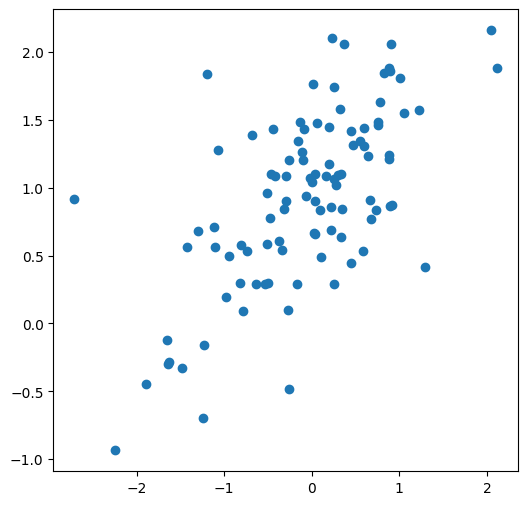

In [178]:
fig , ax = plt.subplots(figsize=(6,6))

ax.scatter(x,Y);
#we observe that the general trend is linear 

<b>(e) Fit a least squares linear model to predict y using x. Comment
 on the model obtained. How do ˆ0 and ˆ1(estimaed coeff) compare to 0 and
 1(true coeff)?

In [179]:
data = pd.DataFrame({'x':x , 'y':Y})
formula = 'y ~ ' + 'x'
result= smf.ols(formula , data= data).fit()
#X= result.model.exog
result.summary()

#We can see that the true coeff are 1 and 0.5 but the model created the coeff estimates of 0.9 and 0.4 - 0.1 less 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           8.04e-13
Time:                        06:30:28   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9620      0.050     19.134      0.000       0.862       1.062
x              0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the true coeff are 1 and 0.5 but the model created the coeff estimates of 0.91 and 0.48 - 0.1 less 

<b>(f) Display the least squares line on the scatterplot obtained in (d).
 Draw the population regression line on the plot, in a different
 color. Use the legend() method of the axes to create an appro
priate legend.

/tmp/ipykernel_2056/4018222859.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, result.params[0],result.params[1] , 'r--', label="least square line");


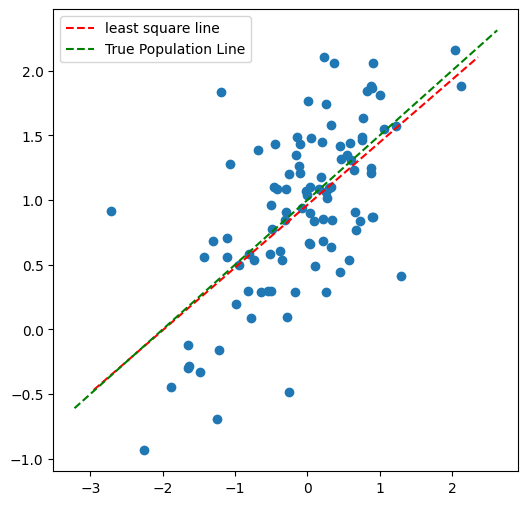

In [180]:
fig , ax = plt.subplots(figsize=(6,6))
def abline(ax, b , m, *arge, **kwargs):
    "Add a line with a slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge, **kwargs)


ax.scatter(x,Y)
#ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, result.params[0],result.params[1] , 'r--', label="least square line");
abline(ax, 1,0.5 , 'g--', label="True Population Line");
ax.legend();



<b> (g)Now fit a polynomial regression model that predicts y using x
 and x2. Is there evidence that the quadratic term improves the
 model fit? Explain your answer.

In [181]:
datasq = pd.DataFrame({'x':np.square(x) , 'y':Y})
formula = 'y ~ ' + 'x'
resultsq= smf.ols(formula , data= datasq).fit()
#X= result.model.exog
resultsq.summary()
#the rsq value decreased by a lot , the x now also posessan inverse relationship with response variable even though the p value of x is statistically significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.433
Date:                Wed, 08 Oct 2025   Prob (F-statistic):             0.0218
Time:                        06:30:28   Log-Likelihood:                -95.335
No. Observations:                 100   AIC:                             194.7
Df Residuals:                      98   BIC:                             199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0175      0.075     13.657      0.000       0.870       1.165
x             -0.1248      0.054     -2.331      0.022      -0.231      -0.019
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.052
Skew:                           0.007   Prob(JB):                        0.974
Kurtosis:                       2.889   Cond. No.                         1.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> (h) Repeat (a)–(f) after modifying the data generation process in
 such a way that there is less noise in the data. The true model eqn
 should remain the same. You can do this by decreasing the vari
ance of the normal distribution used to generate the error term
 in (b). Describe your results.

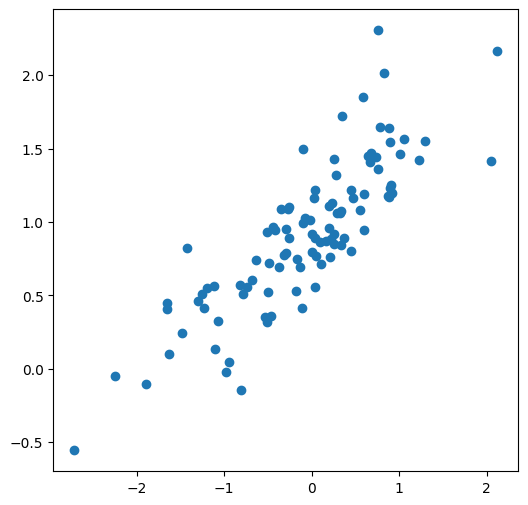

In [182]:
epslow = rng.normal(loc=0, scale =0.3, size=n) #variance is 0.09
Y = 1 + 0.5*x + epslow
fig , ax = plt.subplots(figsize=(6,6))
ax.scatter(x,Y); 



In [183]:
datalow = pd.DataFrame({'x':x , 'y':Y})
formula = 'y ~ ' + 'x'
resultlow= smf.ols(formula , data= datalow).fit()
#X= result.model.exog
resultlow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.17e-27
Time:                        06:30:28   Log-Likelihood:                -12.399
No. Observations:                 100   AIC:                             28.80
Df Residuals:                      98   BIC:                             34.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9514      0.028     34.258      0.000       0.896       1.007
x              0.4962      0.032     15.270      0.000       0.432       0.561
==============================================================================
Omnibus:                        8.984   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.078
Skew:                           0.522   Prob(JB):                      0.00648
Kurtosis:                       4.152   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_2056/4028332094.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, resultlow.params[0],resultlow.params[1] , 'r--', label="least square line with lower eps");


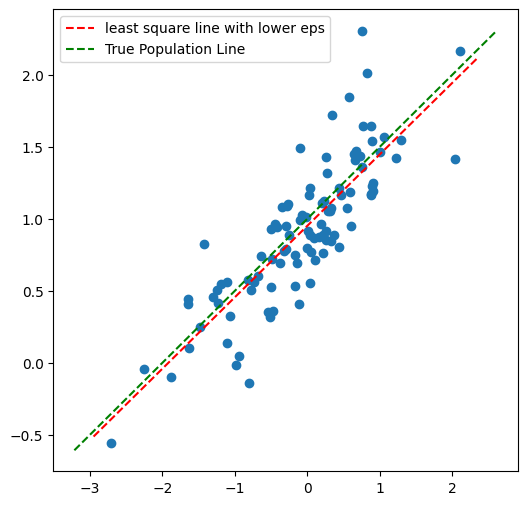

In [184]:
fig , ax = plt.subplots(figsize=(6,6))
def abline(ax, b , m, *arge, **kwargs):
    "Add a line with a slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge, **kwargs)


ax.scatter(x,Y)
#ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, resultlow.params[0],resultlow.params[1] , 'r--', label="least square line with lower eps");
abline(ax, 1,0.5 , 'g--', label="True Population Line");
ax.legend();

We notice that the datapoints are more together and centered , the regression line is more closer to the tru population regression line and the coefficients from the model are also closer , overall , by decreasing the eps we have made the mdoel a better fit the Rsq value also increased by a lot 

 <b>(i) Repeat (a)–(f) after modifying the data generation process in
 such a way that there is more noise in the data. The model
true eqn should remain the same. You can do this by increasing
 the variance of the normal distribution used to generate the
 error term in (b). Describe your results.

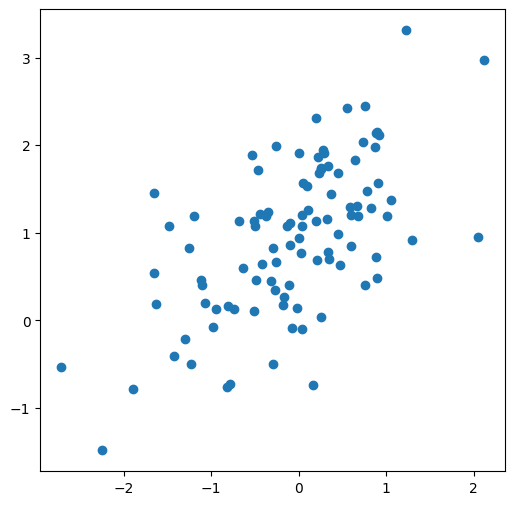

In [185]:
epshigh = rng.normal(loc=0, scale =0.8, size=n) #variance is 0.64
Y = 1 + 0.5*x + epshigh
fig , ax = plt.subplots(figsize=(6,6))
ax.scatter(x,Y); 

In [186]:
datahigh = pd.DataFrame({'x':x , 'y':Y})
formula = 'y ~ ' + 'x'
resulthigh= smf.ols(formula , data= datahigh).fit()
#X= result.model.exog
resulthigh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     56.93
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.34e-11
Time:                        06:30:28   Log-Likelihood:                -104.79
No. Observations:                 100   AIC:                             213.6
Df Residuals:                      98   BIC:                             218.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9927      0.070     14.188      0.000       0.854       1.132
x              0.6176      0.082      7.545      0.000       0.455       0.780
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   2.355
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.930
Skew:                          -0.118   Prob(JB):                        0.628
Kurtosis:                       2.591   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_2056/3377190557.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, resulthigh.params[0],resulthigh.params[1] , 'r--', label="least square line with lower eps");


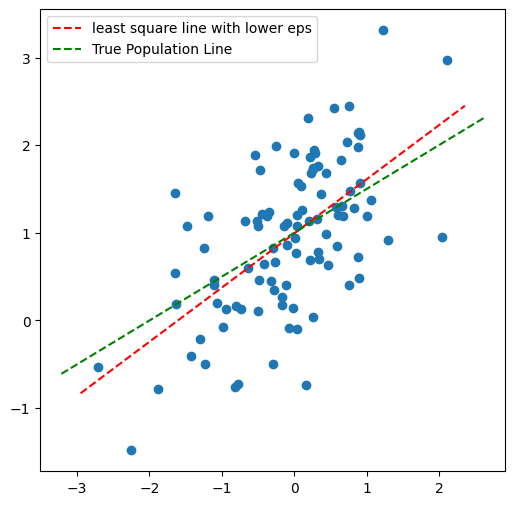

In [187]:
fig , ax = plt.subplots(figsize=(6,6))
def abline(ax, b , m, *arge, **kwargs):
    "Add a line with a slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge, **kwargs)


ax.scatter(x,Y)
#ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, resulthigh.params[0],resulthigh.params[1] , 'r--', label="least square line with lower eps");
abline(ax, 1,0.5 , 'g--', label="True Population Line");
ax.legend();

the rsq value increased a lot , the datapoints scattered , and the regressionlines not dont collide at all , making this model an overall a bad fit by increasing the std dev and variance

 <b>(j) What are the confidence intervals for 0 and 1 based on the
 original data set, the noisier data set, and the less noisy data
 set? Comment on your results

In [188]:

print(f"confidence interval for high eps dataset:\n {resulthigh.conf_int(alpha=0.05)}\n")
print(f"confidence interval for True eps dataset:\n {result.conf_int(alpha=0.05)}\n")
print(f"confidence interval for Low eps dataset:\n {resultlow.conf_int(alpha=0.05)}")

confidence interval for high eps dataset:
                   0         1
Intercept  0.853831  1.131514
x          0.455157  0.780034

confidence interval for True eps dataset:
                   0         1
Intercept  0.862218  1.061756
x          0.367565  0.601017

confidence interval for Low eps dataset:
                   0         1
Intercept  0.896308  1.006535
x          0.431685  0.560646


we can see that for a better model or a truer the relainship, lesser the variance error term(irreducible error) the confidence interval tightened , the more the error , the wider is the confidence interval

<b>14. This problem focuses on the collinearity problem.<br>
 (a) Perform the following commands in Python

In [189]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

<b>The last line corresponds to creating a linear model in which y is
 a function of x1 and x2. Write out the form of the linear model.
 What are the regression coefficients?</b><br><br>
 linear form equation => y = beta0 + beta1x1 + beta2x2 + epsilon<br>
 coeff => beta0 = 2 , beta1 = 2, beta2 = 0.3

<b>(b) What is the correlation between x1 and x2? Create a scatterplot
 displaying the relationship between the variables.

          x1        x2
x1  1.000000  0.772324
x2  0.772324  1.000000


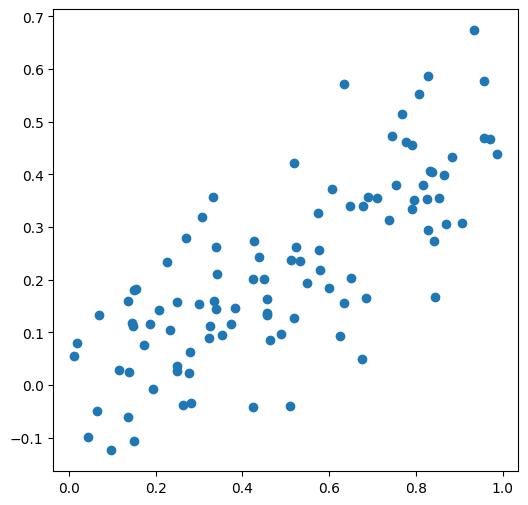

In [190]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x1,x2);
frame= pd.DataFrame({'x1':x1, 'x2':x2})
print(frame.corr())



<b> (c) Using this data, fit a least squares regression to predict y using
 x1 and x2. Describe the results obtained. What are estimates beta0, beta1, and
beata 2? How do these relate to the true beta 0, 1, and 2? Can you
 reject the null hypothesis H0 : 1 =0? How about the null
 hypothesis H0 : 2 =0?

In [191]:
frame['y']=y

In [192]:
formula ='y ~ x1 + x2'
resultco= smf.ols(formula , data= frame).fit()
#X= resultco.model.exog
resultco.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           5.76e-08
Time:                        06:30:29   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we notice that x2 can be rejected while the coeff estimates of beta0 and beta1 are very far off from 2, their true value , null hypothesis for h0:1 = 0 is rejected 

<b>(d) Now fit a least squares regression to predict y using only x1.
 Comment on your results. Can you reject the null hypothesis
 H0 : 1 =0?

In [193]:
formula ='y ~ x1'
resultco1= smf.ols(formula , data= frame).fit()
#X= resultco.model.exog
resultco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.37e-08
Time:                        06:30:29   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we notice that the coeff estimate is now closer to the true coeffcient and ys we will reject the null hypothesis h0:beta1=0

<b>(e) Now fit a least squares regression to predict y using only x2.
 Comment on your results. Can you reject the null hypothesis
 H0 : 1 =0?

In [194]:
formula ='y ~ x2'
resultco2= smf.ols(formula , data= frame).fit()
#X= resultco.model.exog
resultco2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           7.43e-07
Time:                        06:30:29   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rsq value decreased , the coeff is valid but is far off the orignal value , it is not even in 95% confidence interval , we would now reject the null hypo of h0:beta2 =0 as p value makes this that we have wnough evidence that the coeff statistically significant and not by chance

<b>(f) Do the results obtained in (c)–(e) contradict each other? Explain
 your answer.

the first model showed that x2 is not significant while the individual models proved otherwise , this is due to high colinearity between the predictors , 0.7

<b>(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to 
add this additional observation to each of x1, x2 and y.

In [195]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

<b>Re-fit the linear models from (c) to (e) using this new data. What
 effect does this new observation have on the each of the models?
 In each model, is this observation an outlier? A high-leverage
 point? Both? Explain your answers.

In [196]:
frame1=pd.DataFrame({'x1':x1, 'x2':x2 , 'y':y})

In [197]:
formula = 'y ~ x1 + x2'
resultcol = smf.ols(formula , data=frame1).fit()
resultcol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           4.60e-08
Time:                        06:30:29   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

x1 became insignificant now 

In [198]:
formula = 'y ~ x1'
resultcol1 = smf.ols(formula , data=frame1).fit()
resultcol1.summary()
#x1 is now slighly significant again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           9.23e-07
Time:                        06:30:29   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
formula = 'y ~ x2'
resultcol2 = smf.ols(formula , data=frame1).fit()
resultcol2.summary()
#x2 is also now significant individually
#x2 alone is alos explaining the model , rsq value is a lot compared to x1 alone , its like x1 did not matter
print(len(x1), len(x2), len(y))

101 101 101


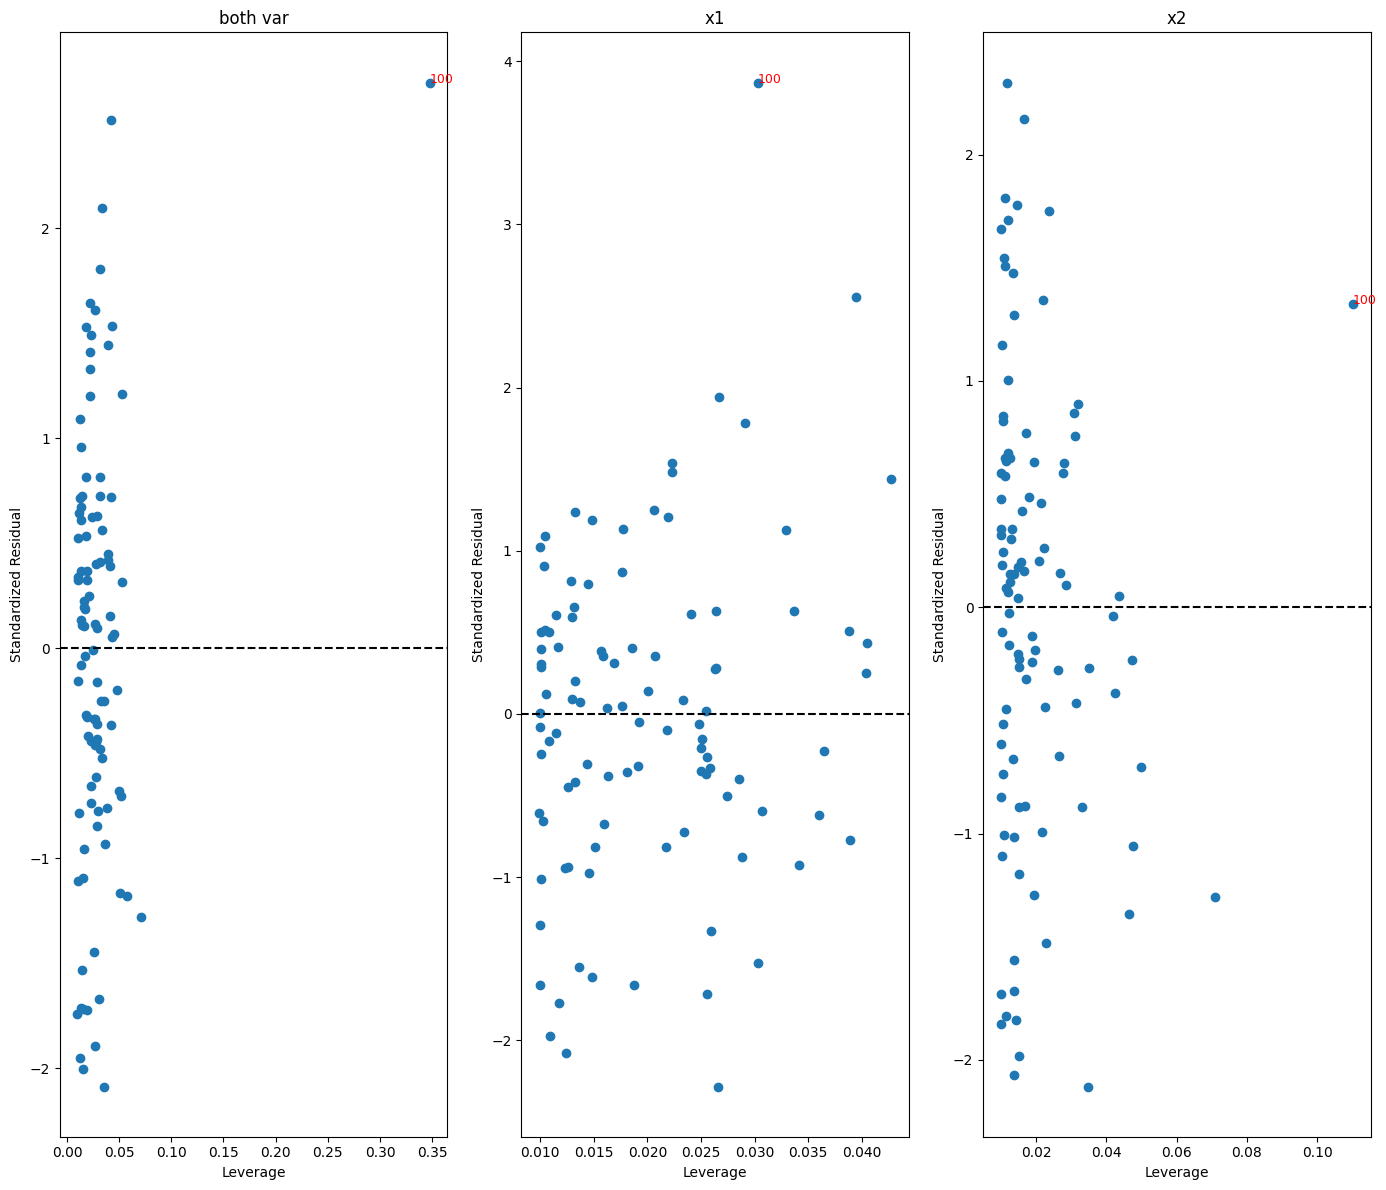

In [204]:
#leverage plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 12))
ax = ax.flatten()
results = [resultcol, resultcol1, resultcol2]

titles = [
    "both var",
    "x1",
    "x2"
]

for i, res in enumerate(results):
    influence = res.get_influence()
    leverage = influence.hat_matrix_diag
    standardized_resid = influence.resid_studentized_internal
    
    ax[i].scatter(leverage, standardized_resid)
    #for j in range(len(leverage)):
    ax[i].text(leverage[100], standardized_resid[100], str(100), fontsize=9, color='red')

    ax[i].set_xlabel("Leverage")
    ax[i].set_ylabel("Standardized Residual")
    ax[i].set_title(titles[i])
    ax[i].axhline(0, color="k", linestyle="--")
    

fig.tight_layout()

both vars - high lev , med residual (high lev point that is not an outlier)
x1 - very low lev, very high residual (clear outlier)
x2 - med lev, low residual (ordianry datapoint)

<b> 15. This problem involves the Boston data set, which we saw in the lab
 for this chapter. We will now try to predict per capita crime rate
 using the other variables in this data set. In other words, per capita
 crime rate is the response, and the other variables are the predictors.<br><br>
 (a) For each predictor, fit a simple linear regression model to predict
 the response. Describe your results. In which of the models is
 there a statistically significant association between the predictor
 and the response? Create some plots to back up your assertions.

In [207]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [218]:
results=[]
for i, col_name in enumerate(Boston.columns):
    if col_name != 'medv':
        formula = "medv ~" + Boston.columns[i]
        model = smf.ols(formula, data = Boston).fit()
        results.append(model)
        print("Coefficients of:", col_name)
        print(results[i].params)
        print("\nP-values of ", col_name)
        print(results[i].pvalues)
        print(f"\nR-squared: of {col_name} are {results[i].rsquared}")
        print(f"Adjusted R-squared: of {col_name} are {results[i].rsquared_adj}")


Coefficients of: crim
Intercept    24.033106
crim         -0.415190
dtype: float64

P-values of  crim
Intercept    1.341723e-227
crim          1.173987e-19
dtype: float64

R-squared: of crim are 0.15078046904975717
Adjusted R-squared: of crim are 0.14909550966295115
Coefficients of: zn
Intercept    20.917579
zn            0.142140
dtype: float64

P-values of  zn
Intercept    9.489803e-195
zn            5.713584e-17
dtype: float64

R-squared: of zn are 0.12992084489428957
Adjusted R-squared: of zn are 0.12819449736431787
Coefficients of: indus
Intercept    29.754897
indus        -0.648490
dtype: float64

P-values of  indus
Intercept    6.704987e-173
indus         4.900260e-31
dtype: float64

R-squared: of indus are 0.23399003044447508
Adjusted R-squared: of indus are 0.23247016939376963
Coefficients of: chas
Intercept    22.093843
chas          6.346157
dtype: float64

P-values of  chas
Intercept    7.002789e-208
chas          7.390623e-05
dtype: float64

R-squared: of chas are 0.030716

All predictors are highly significant , but this could be a case of multicolinearity in multiple regression and might increase some of the p values of some predictors 